# Section 4.6 — Generalized linear models

This notebook contains the code examples from [Section 4.6 Generalized linear models]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Figures setup
import matplotlib.pyplot as plt
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (4, 2)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/generalized"

<Figure size 640x480 with 0 Axes>

In [3]:
from ministats.utils import savefigure

In [4]:
#######################################################

## Definitions

### Probability representations and link functions 

#### Odds

In [5]:
0.5/(1-0.5), 0.9/(1-0.9), 0.2/(1-0.2)

(1.0, 9.000000000000002, 0.25)

#### Log-odds

In [6]:
np.log(0.5/(1-0.5)), np.log(0.9/(1-0.9)), np.log(0.2/(1-0.2))

(0.0, 2.1972245773362196, -1.3862943611198906)

#### The logit function

In [7]:
def logit(p):
    x = np.log(p / (1-p))
    return x

# ALT. import the function from `scipy.special`
from scipy.special import logit

In [8]:
logit(0.5), logit(0.9), logit(0.2)

(0.0, 2.1972245773362196, -1.3862943611198906)

#### The logistic function

In [9]:
def expit(x):
    p = 1 / (1 + np.exp(-x))
    return p

# ALT. import the function from `scipy.special`
from scipy.special import expit

In [10]:
expit(0), expit(2), expit(-2)

(0.5, 0.8807970779778823, 0.11920292202211755)

Saved figure to figures/lm/generalized/logistic_and_logit_functions.pdf
Saved figure to figures/lm/generalized/logistic_and_logit_functions.png


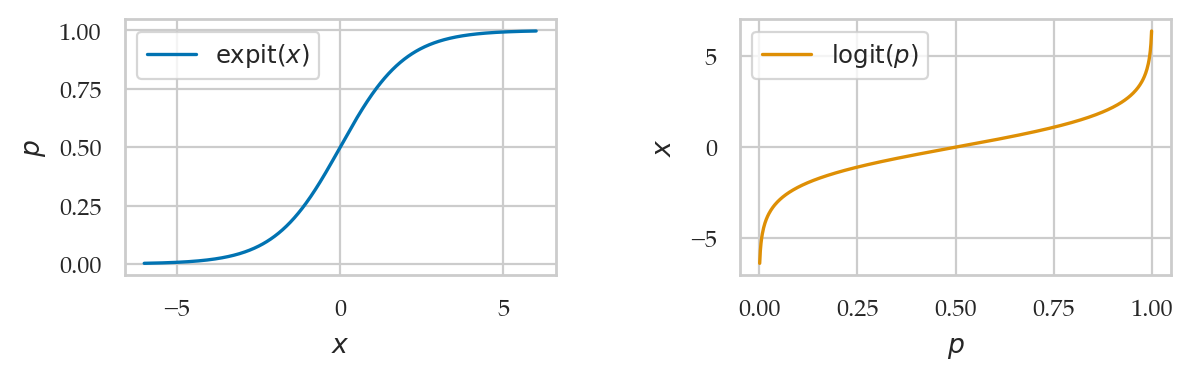

In [11]:
# FIGURES ONLY
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))

# plot the expit function, a.k.a. the logistic function
xs = np.linspace(-6, 6, 500)
sns.lineplot(x=xs, y=expit(xs), ax=ax1, label="$\\text{expit}(x)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$p$")

# plot the logit function
ps = np.linspace(0, 1, 600)
sns.lineplot(x=ps, y=logit(ps), ax=ax2, label="$\\text{logit}(p)$", color="C1")
ax2.set_xlabel("$p$")
ax2.set_ylabel("$x$")


filename = os.path.join(DESTDIR, "logistic_and_logit_functions.pdf")
savefigure(fig, filename, tight_layout_kwargs=dict(w_pad=3))

#### The logistic and logit functions are inverses 

In [12]:
expit(logit(0.2))

0.2

In [13]:
logit(expit(3))

3.000000000000003

## Logistic regression

TODO FORMULA

Saved figure to figures/lm/generalized/logistic_regression_xy_with_stemplots.pdf
Saved figure to figures/lm/generalized/logistic_regression_xy_with_stemplots.png


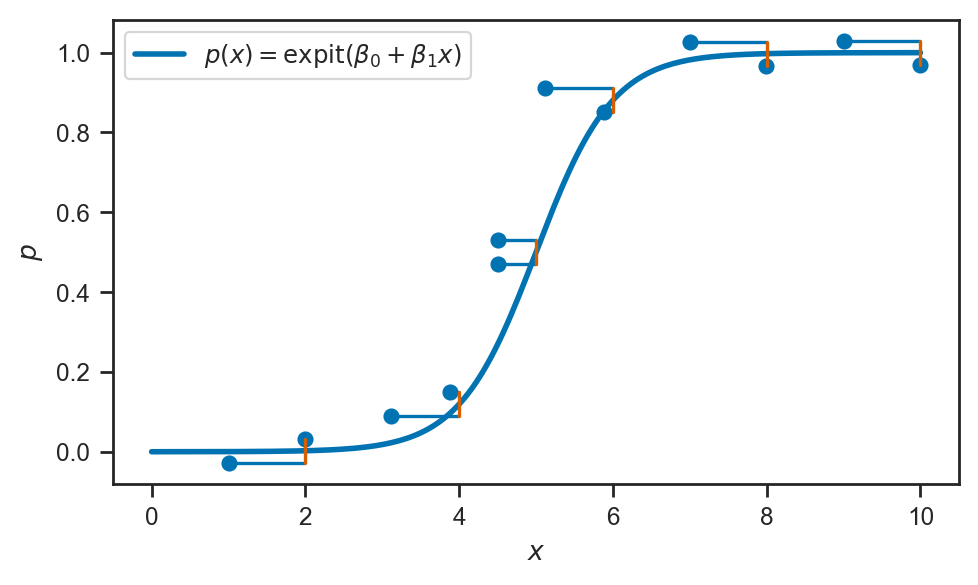

In [14]:
# FIGURES ONLY
from scipy.stats import bernoulli
from scipy.special import expit

# Define the logistic regression model function
def expit_model(x):
    p = expit(-10 + 2*x)
    return p

xlims = [0, 10]

stem_half_width = 0.03

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the logistic regression model
    xs = np.linspace(xlims[0], xlims[1], 200)
    ps = expit_model(xs)
    sns.lineplot(x=xs, y=ps, ax=ax, label=r"$p(x) = \text{expit}(\beta_0 + \beta_1x)$", linewidth=2)

    # Plot Bernoulli distributions at specified x positions
    x_positions = [2,4,5,6,8,10]
    for x_pos in x_positions:
        p_pos = expit_model(x_pos)
        ys = [0,1]
        pmf = bernoulli(p=p_pos).pmf(ys)
        ys_plot = [p_pos-stem_half_width, p_pos+stem_half_width]
        ax.stem(ys_plot, x_pos - pmf, bottom=x_pos, orientation='horizontal')

    # Figure setup
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p$")
    ax.legend(loc="upper left")

    filename = os.path.join(DESTDIR, "logistic_regression_xy_with_stemplots.pdf")
    savefigure(fig, filename)

In [15]:
expit(-6)

0.0024726231566347743

In [16]:
expit(10)

0.9999546021312976

### Example 1: hiring student interns

In [17]:
interns = pd.read_csv("../datasets/interns.csv")
print(interns.shape)
interns.head(3)

(100, 2)


,work,hired
0,42.5,1
1,39.3,0
2,43.2,1


In [18]:
import statsmodels.formula.api as smf

lr1 = smf.logit("hired ~ 1 + work", data=interns).fit()
print(lr1.params)

Optimization terminated successfully.
         Current function value: 0.138101
         Iterations 10
Intercept   -78.693205
work          1.981458
dtype: float64


In [19]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.8005
Time:                        18:40:41   Log-Likelihood:                -13.810
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.385e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.6932     19.851     -3.964      0.000    -117.600     -39.787
work           1.9815      0.500      3.959      0.000       1.001       2.962
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

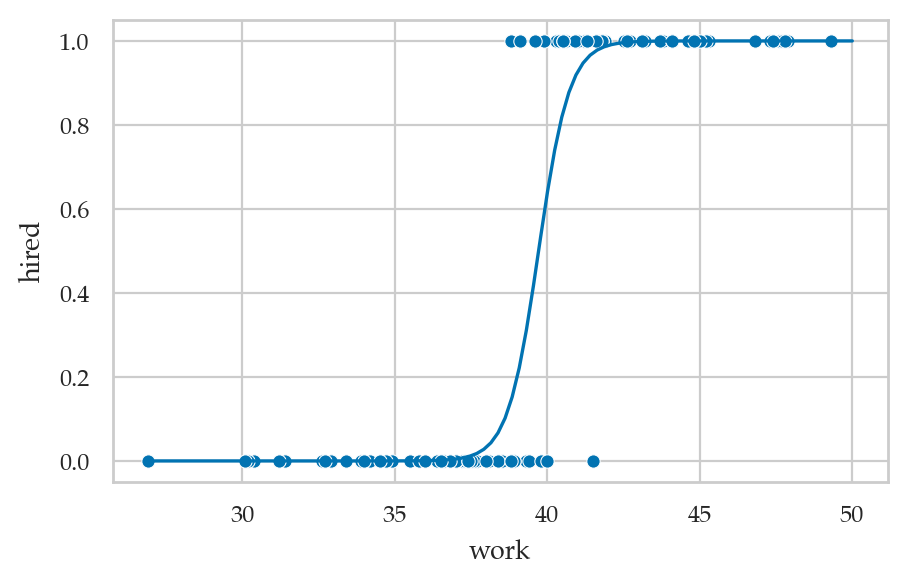

In [20]:
ax = sns.scatterplot(data=interns, x="work", y="hired")
wgrid = np.linspace(27, 50, 100)
hired_preds = lr1.predict({"work": wgrid})
sns.lineplot(x=wgrid, y=hired_preds, ax=ax);

Saved figure to figures/lm/generalized/logistic_regression_interns_hired_vs_work.pdf
Saved figure to figures/lm/generalized/logistic_regression_interns_hired_vs_work.png


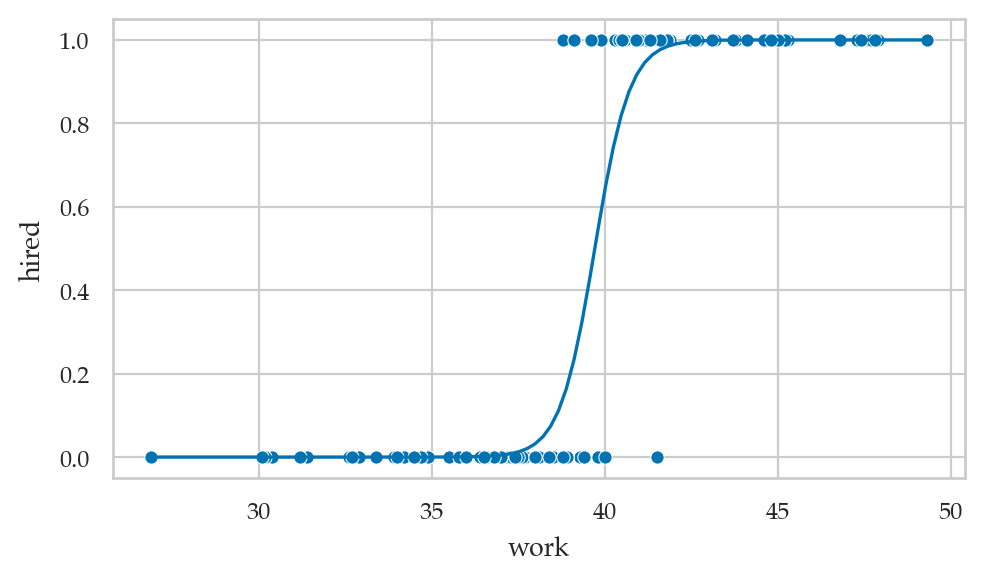

In [21]:
from ministats import plot_reg
plot_reg(lr1)

# FIGURES ONLY
filename = os.path.join(DESTDIR, "logistic_regression_interns_hired_vs_work.pdf")
savefigure(plt.gcf(), filename)

In [22]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.8005
Time:                        18:40:42   Log-Likelihood:                -13.810
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.385e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.6932     19.851     -3.964      0.000    -117.600     -39.787
work           1.9815      0.500      3.959      0.000       1.001       2.962
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Interpreting the model parameters

#### Parameters as changes in the log-odds

In [23]:
lr1.params["work"]

1.9814577697476699

#### Parameters as ratios of odds

In [24]:
expit(lr1.params["work"])

0.8788364754400606

#### Differences in probabilities

What is the *marginal effect* of the predictor `work`
for an intern who invests 40 hours of effort?

In [25]:
# using `statsmodels`
lr1.get_margeff(atexog={1:40}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.45783,0.112623,4.065157,0.000048,0.237093,0.678567


In [26]:
# # ALT. manual calculation plugging into derivative of `expit`
# p40 = lr1.predict({"work":40}).item()
# marg_effect_at_40 = p40 * (1 - p40) * lr1.params['work']
# marg_effect_at_40

### Prediction

In [27]:
p42 = lr1.predict({"work":42})[0]
p42

0.9893134055105761

## Poisson regression

Saved figure to figures/lm/generalized/poisson_regression_xy_with_stemplots.pdf
Saved figure to figures/lm/generalized/poisson_regression_xy_with_stemplots.png


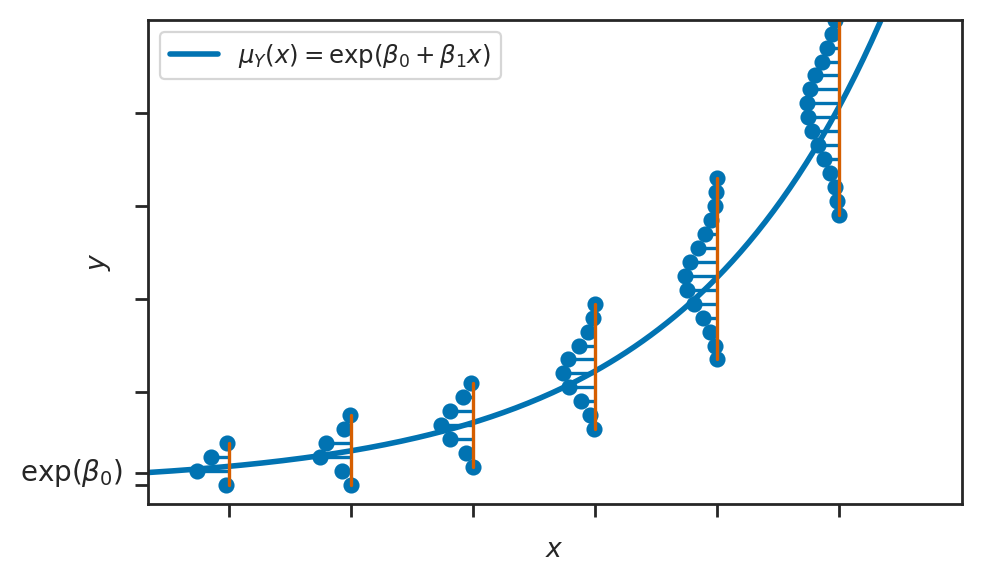

In [28]:
# FIGURES ONLY
from scipy.stats import poisson

# Define the linear model function
def exp_model(x):
    lam = np.exp(1 + 0.2*x)
    return lam

onepixel = 0.07

xlims = [0, 20]
ylims = [0, 100]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the linear model
    xs = np.linspace(xlims[0], xlims[1], 200)
    lams = exp_model(xs)
    sns.lineplot(x=xs, y=lams, ax=ax, label=r"$\mu_Y(x) = \exp(\beta_0 + \beta_1x)$", linewidth=2)
    
    # Plot Gaussian distributions at specified x positions and add sigma lines
    x_positions = range(2, xlims[1]-1, 3)
    for x_pos in x_positions:
        lam_pos = exp_model(x_pos)
        sigma = np.sqrt(lam_pos)
        ys_lower = int(lam_pos-2.5*sigma)
        ys_upper = int(lam_pos+3.4*sigma)
        ys = np.arange(ys_lower, ys_upper, 3)
        pmf = poisson(mu=lam_pos).pmf(ys)
        # ax.fill_betweenx(ys, x_pos - 2 * pmf * sigma, x_pos, color="grey", alpha=0.5)
        ax.stem(ys, x_pos- 2 * pmf * sigma, bottom=x_pos, orientation='horizontal')
        # Draw vertical sigma line and label it on the opposite side of the Gaussian shape
        # ax.plot([x_pos+onepixel, x_pos+onepixel], [lam_pos, lam_pos - sigma], "k", lw=1)
        # ax.text(x_pos + 0.1, lam_pos - sigma / 2 - 3*onepixel, r"$\sigma$", fontsize=12, va="center")

    # y-intercept
    ax.text(0 - 0.6, np.exp(1), r"$\exp(\beta_0)$", fontsize=10, va="center", ha="right")

    # Set up x-axis
    ax.set_xlim(xlims)
    ax.set_xlabel("$x$")
    ax.set_xticks(range(2, xlims[1], 3))
    ax.set_xticklabels([])
    
    # Set up y-axis
    ax.set_ylim([ylims[0]-4,ylims[1]])
    ax.set_ylabel("$y$")
    ax.set_yticks(list(range(ylims[0],ylims[1],20)) + [np.exp(1)] )
    ax.set_yticklabels([])
    
    ax.legend(loc="upper left")

    filename = os.path.join(DESTDIR, "poisson_regression_xy_with_stemplots.pdf")
    savefigure(fig, filename)

### Example 2: hard disk failures over time

In [29]:
hdisks = pd.read_csv("../datasets/hdisks.csv")
hdisks.head(3)

,age,failures
0,1.7,3
1,14.6,46
2,10.9,23


In [30]:
import statsmodels.formula.api as smf

pr2 = smf.poisson("failures ~ 1 + age", data=hdisks).fit()
pr2.params

Optimization terminated successfully.
         Current function value: 2.693129
         Iterations 6


Intercept    1.075999
age          0.193828
dtype: float64

In [31]:
pr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               failures   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.6412
Time:                        18:40:43   Log-Likelihood:                -269.31
converged:                       True   LL-Null:                       -750.68
Covariance Type:            nonrobust   LLR p-value:                2.271e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0760      0.076     14.114      0.000       0.927       1.225
age            0.1938      0.007     28.603      0.000       0.181       0.207
==============================================================================
"""

Saved figure to figures/lm/generalized/poisson_regression_hdisks_failures_vs_age.pdf
Saved figure to figures/lm/generalized/poisson_regression_hdisks_failures_vs_age.png


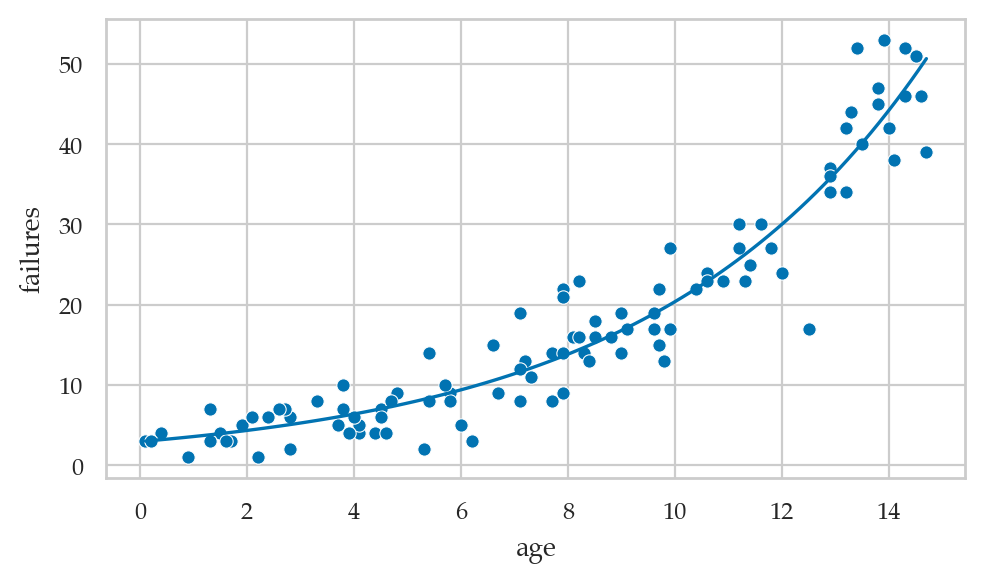

In [32]:
from ministats import plot_reg
plot_reg(pr2)

# FIGURES ONLY
filename = os.path.join(DESTDIR, "poisson_regression_hdisks_failures_vs_age.pdf")
savefigure(plt.gcf(), filename)

In [33]:
pr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               failures   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.6412
Time:                        18:40:44   Log-Likelihood:                -269.31
converged:                       True   LL-Null:                       -750.68
Covariance Type:            nonrobust   LLR p-value:                2.271e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0760      0.076     14.114      0.000       0.927       1.225
age            0.1938      0.007     28.603      0.000       0.181       0.207
==============================================================================
"""

### Interpreting the model parameters

#### Log-counts

In [34]:
pr2.params["age"]

0.19382784821454072

#### Incidence rate ratio (IRR)

In [35]:
np.exp(pr2.params["age"])

1.213887292102993

#### Marginal effect

What is the marginal effect of the predictor `age`
for a 10 year old hard disk installation?

In [36]:
# using `statsmodels` .get_margeff() method
pr2.get_margeff(atexog={1:10}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
age,3.94912,0.151882,26.001165,4.804151e-149,3.651435,4.246804


In [37]:
# # ALT. manual calculation of the slope by evaluating the derivative
# b_0 = pr2.params['Intercept']
# b_age = pr2.params['age']
# np.exp(b_0 + b_age*10)*b_age

### Predictions

In [38]:
pr2.predict({"age":10})[0]

20.374365915173986

## Explanations

### The exponential family of distributions

- exponential
- Gaussian (normal)
- Poisson
- Binomial
- 

### The generalized linear model template

- choose 


### Generalized linear models using statsmodels

In [39]:
import statsmodels.api as sm

Norm = sm.families.Gaussian()
Bin = sm.families.Binomial()
Pois = sm.families.Poisson()

#### Linear model

In [40]:
students = pd.read_csv('../datasets/students.csv')
formula0 = "score ~ 1 + effort"
glm0 = smf.glm(formula0, data=students, family=Norm).fit()
glm0.params

Intercept    32.465809
effort        4.504850
dtype: float64

#### Logistic regression

In [41]:
formula1 = "hired ~ 1 + work"
glm1 = smf.glm(formula1, data=interns, family=Bin).fit()
glm1.params
# glm1.summary()

Intercept   -78.693205
work          1.981458
dtype: float64

#### Poisson regression

In [42]:
formula2 = "failures ~ 1 + age"
glm2 = smf.glm(formula2, data=hdisks, family=Pois).fit()
glm2.params
# glm2.summary()

Intercept    1.075999
age          0.193828
dtype: float64

### Fitting generalized linear models

### Standardization of predictors

In [43]:
from scipy.stats import zscore

efforts = students["effort"]
zefforts = zscore(efforts)
zefforts.head(3)

0    1.092044
1   -0.114057
2   -0.161876
Name: effort, dtype: float64

In [44]:
# # ALT. define custom function equivalent to zscore(data)
# def standardize(data):
#     datamean = data.mean()
#     datastd = data.std(ddof=1)
#     zdata = (data - datamean) / datastd
#     return zdata

In [45]:
students["zeffort"] = zefforts
lm1s = smf.ols("score~1+zeffort", data=students).fit()
lm1s.params

Intercept    72.580000
zeffort       8.478568
dtype: float64

In [46]:
lm1s.params["zeffort"] / students["effort"].std(ddof=0)

4.504850344209072

In [47]:
glm0.params["effort"]

4.504850344209074

### Marginal effects

It can be difficult to interpret GLM parameters directly,
but we can always ask the question about "slopes"
the rate of change of interesting parameters.

In [48]:
import marginaleffects as me

#### Raw parameters

In [49]:
lr1.params["work"], np.exp(lr1.params["work"])

(1.9814577697476699, 7.25330893626573)

The parameter tells us the log-odds ratio changes by 1.981,
or equivalently,
that the odd-ratio changes by a factor of 7.253 for each additional hour of `work`.

#### Marginal effect at a user-specified value



**Example** To calculate the marginal effect of the predictor `work`
for an intern who invests 40 hours of effort.

In [50]:
# using `statsmodels`
lr1.get_margeff(atexog={1:40}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.45783,0.112623,4.065157,0.000048,0.237093,0.678567


In [51]:
# ALT. using `marginaleffects`
dg40 = me.datagrid(lr1, work=[40])
me.slopes(lr1, newdata=dg40).to_pandas()

,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
0,work,dY/dX,0.45783,0.112263,4.078207,0.000045,14.427447,0.237799,0.677861


In [52]:
# ALT2. manual calculation plugging into derivative of `expit`
p40 = lr1.predict({"work":40}).item()
marg_effect_at_40 = p40 * (1 - p40) * lr1.params['work']
marg_effect_at_40

0.45782997989918905

#### Average marginal effect (AME)

For each observation $(w_i,h_i)$,
compute the marginal effect at $w=w_i$,
then average them together.

In [53]:
lr1.get_margeff().summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.08077,0.00422,19.139418,1.185874e-81,0.072499,0.089041


In [54]:
# ALT. using the `marginaleffects` package
me.avg_slopes(lr1).to_pandas()

,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
0,work,mean(dY/dX),0.08077,0.00422,19.138224,0.0,inf,0.072498,0.089042


In [55]:
# ALT2. manual computation using a for-loop
meffects = []
for i, row in interns.iterrows():
    p = lr1.predict({"work":row["work"]}).item()
    meffect = p * (1-p) * lr1.params['work']
    meffects.append(meffect)
AME = np.mean(meffects)
AME

0.08076985840552156

#### Marginal effect at the mean (MEM)

In [56]:
lr1.get_margeff(at="mean").summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.47034,0.121697,3.864838,0.000111,0.231818,0.708862


In [57]:
# ALT. using the `marginaleffects` package
me.slopes(lr1, newdata="mean").to_pandas()

,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
0,work,dY/dX,0.47034,0.121818,3.861021,0.000113,13.112488,0.231582,0.709098


In [58]:
# ALT2. manual computation
meanwork = interns["work"].mean()
p_at_mean = lr1.predict({"work":meanwork}).item()
MEM = p_at_mean * (1-p_at_mean) * lr1.params['work']
MEM

0.47034017780957577

The `marginaleffects` package provides some useful plots to visualize the predictions and slopes.

In [59]:
# me.plot_predictions(lr1, condition="work")
# me.plot_slopes(lr1, condition="work")

Links to learn more about marginal effects

- https://www.youtube.com/watch?v=ANDC_kkAjeM
- https://marginaleffects.com/
- https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.get_margeff.html
- https://lost-stats.github.io/Model_Estimation/Statistical_Inference/Marginal_Effects_in_Nonlinear_Regression.html
- https://clas.ucdenver.edu/marcelo-perraillon/sites/default/files/attached-files/perraillon_marginal_effects_lecture_lisbon.pdf

## Discussion

### Model diagnostics and validation

In [60]:
# Dispersion from GLM attributes
# glm2.pearson_chi2 / glm2.df_resid

In [61]:
# Calculate Pearson chi-squared statistic
observed = hdisks['failures']
predicted = pr2.predict()
pearson_residuals = (observed - predicted) / np.sqrt(predicted)
pearson_chi2 = np.sum(pearson_residuals**2)
df_resid = pr2.df_resid
dispersion = pearson_chi2 / df_resid
print(f'Dispersion: {dispersion}')
# If dispersion > 1, consider Negative Binomial regression

Dispersion: 0.9869289289681199


### ScikitLearn models

In [62]:
# Cross check with sklearn
from sklearn.linear_model import LogisticRegression
X1_skl = interns[["work"]]
y1_skl = interns["hired"]
lr1_skl = LogisticRegression(penalty=None).fit(X1_skl, y1_skl)
lr1_skl.intercept_, lr1_skl.coef_

(array([-78.69320824]), array([[1.98145785]]))

In [63]:
lr1.params

Intercept   -78.693205
work          1.981458
dtype: float64

In [64]:
hdisks.dtypes

age         float64
failures      int64
dtype: object

In [65]:
from sklearn.linear_model import PoissonRegressor
X2_skl = hdisks[["age"]]
y2_skl = hdisks["failures"]
pr2_skl = PoissonRegressor(alpha=0).fit(X2_skl, y2_skl)
pr2_skl.intercept_, pr2_skl.coef_

(1.0759942750890905, array([0.19382823]))

In [66]:
pr2.params

Intercept    1.075999
age          0.193828
dtype: float64

### Logistic regression as a building blocks for neural networks


The operation of the [perceptron](https://en.wikipedia.org/wiki/Perceptron),
which is the basic building block of neural networks,
is essentially the same as linear regression model:

- constant intercept (bias term)
- linear combination of inputs
- nonlinear function used to force the output to be between 0 and 1



### Limitations of GLMs

- GLMs assume observations are independent
- Assumes distribution $\mathcal{M}$ is one of the exponential family
- Outliers can be problematic
- Interpretability


## Exercises

### Exercise: students pass or fail

In [67]:
students = pd.read_csv('../datasets/students.csv')
students["passing"] = (students["score"] > 70).astype(int)
# students.head()

Optimization terminated successfully.
         Current function value: 0.276583
         Iterations 8
Intercept   -16.257302
effort        2.047882
dtype: float64
Saved figure to figures/lm/generalized/logistic_regression_students_passing_vs_effort.pdf
Saved figure to figures/lm/generalized/logistic_regression_students_passing_vs_effort.png


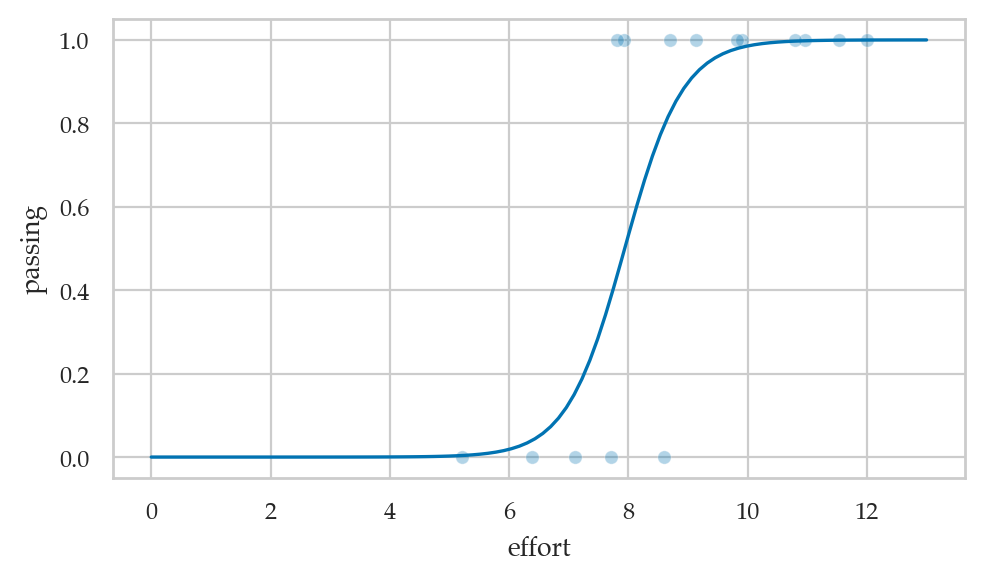

In [68]:
lmpass = smf.logit("passing ~ 1 + effort", data=students).fit()
print(lmpass.params)

efforts = np.linspace(0, 13, 100)
passing_preds = lmpass.predict({"effort": efforts})
ax = sns.scatterplot(data=students, x="effort", y="passing", alpha=0.3)
sns.lineplot(x=efforts, y=passing_preds, ax=ax);

filename = os.path.join(DESTDIR, "logistic_regression_students_passing_vs_effort.pdf")
savefigure(plt.gcf(), filename)

In [69]:
lmpass.predict({"effort":8})

0    0.531396
dtype: float64

In [70]:
intercept, b_effort = lmpass.params
expit(intercept + b_effort*8)

0.5313963881248303

### Exercise: titanic survival data

cf. [Titanic_Logistic_Regression.ipynb](./explorations/Titanic_Logistic_Regression.ipynb)

In [71]:
titanic_raw = pd.read_csv('../datasets/exercises/titanic.csv')
titanic = titanic_raw[['Survived', 'Age', 'Sex', 'Pclass']]
titanic = titanic.dropna()
titanic.head()

,Survived,Age,Sex,Pclass
0,0,22.0,male,3
1,1,38.0,female,1
2,1,26.0,female,3
3,1,35.0,female,1
4,0,35.0,male,3


In [72]:
formula = "Survived ~ Age + C(Sex) + C(Pclass)"
lrtitanic = smf.logit(formula, data=titanic).fit()
lrtitanic.params

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


Intercept         3.777013
C(Sex)[T.male]   -2.522781
C(Pclass)[T.2]   -1.309799
C(Pclass)[T.3]   -2.580625
Age              -0.036985
dtype: float64

In [73]:
# Cross check with sklearn
from sklearn.linear_model import LogisticRegression
df = pd.get_dummies(titanic, columns=['Sex', 'Pclass'], drop_first=True)
X, y = df.drop('Survived', axis=1), df['Survived']
sktitanic = LogisticRegression(penalty=None)
sktitanic.fit(X, y)
sktitanic.intercept_, sktitanic.coef_

(array([3.77702703]),
 array([[-0.03698571, -2.52276365, -1.30981349, -2.58063585]]))

### Exercise: student admissions dataset

In [74]:
# data = whether students got admitted (admit=1) or not (admit=0) based on their gre and gpa scores, and the rank of their instutution
# raw_data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
binary = pd.read_csv('../datasets/exercises/binary.csv')
binary.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [75]:
lrbinary = smf.logit('admit ~ gre + gpa + C(rank)', data=binary).fit()
lrbinary.params

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

The above model uses the rank=1 as the reference category an the log odds reported are with respect to this catrgory

$$
   \log p(accept|rank=1) / \log p(accept|rank=2) = \texttt{C(rank)rank[T.2]} = -0.675443
$$

etc. for others
rank[T.3] 	-1.340204
rank[T.4] 	-1.551464


See [LogisticRegressionChangeOfReferenceCategoricalValue.ipynb](./explorations/LogisticRegressionChangeOfReferenceCategoricalValue.ipynb) for exercise recodign relative to different refrence level.


In [76]:
# Cross check with sklearn
from sklearn.linear_model import LogisticRegression
df = pd.get_dummies(binary, columns=['rank'], drop_first=True)
X, y = df.drop("admit", axis=1), df["admit"]
lr = LogisticRegression(solver="lbfgs", penalty=None, max_iter=1000)
lr.fit(X, y)
lr.intercept_,  lr.coef_

(array([-3.99001587]),
 array([[ 0.00226442,  0.80404719, -0.67543916, -1.3401993 , -1.5514551 ]]))

### Exercise: LA high schools (NOT A VERY GOOD FIT FOR POISSON MODEL)

Dataset info: 
http://www.philender.com/courses/intro/assign/data.html

This dataset consists of data from computer exercises collected from two high school in the Los Angeles area.


http://www.philender.com/courses/intro/code.html



In [77]:
lahigh_raw = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/notes/lahigh.dta")
lahigh = lahigh_raw.convert_dtypes()

lahigh["gender"] = lahigh["gender"].astype(object).replace({1:"F", 2:"M"})
lahigh["ethnic"] = lahigh["ethnic"].astype(object).replace({
    1:"Native American",
    2:"Asian",
    3:"African-American",
    4:"Hispanic",
    5:"White",
    6:"Filipino",
    7:"Pacific Islander"})
lahigh["school"] = lahigh["school"].astype(object).replace({1:"Alpha", 2:"Beta"})
lahigh

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,M,Hispanic,Alpha,63,36,56.988831,42.450859,2,4
1,1002,M,Hispanic,Alpha,27,44,37.094158,46.820587,2,4
2,1003,F,Hispanic,Alpha,20,38,32.275455,43.566574,2,2
3,1004,F,Hispanic,Alpha,16,38,29.056717,43.566574,2,3
4,1005,F,Hispanic,Alpha,2,14,6.748048,27.248474,3,3
...,...,...,...,...,...,...,...,...,...,...
311,2153,M,Hispanic,Beta,26,46,36.451145,47.884865,2,1
312,2154,F,White,Beta,79,81,66.983231,68.488495,2,3
313,2155,F,Hispanic,Beta,59,56,54.792099,53.179413,0,0
314,2156,F,White,Beta,90,82,76.989479,69.277588,0,0


In [78]:
lahigh

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,M,Hispanic,Alpha,63,36,56.988831,42.450859,2,4
1,1002,M,Hispanic,Alpha,27,44,37.094158,46.820587,2,4
2,1003,F,Hispanic,Alpha,20,38,32.275455,43.566574,2,2
3,1004,F,Hispanic,Alpha,16,38,29.056717,43.566574,2,3
4,1005,F,Hispanic,Alpha,2,14,6.748048,27.248474,3,3
...,...,...,...,...,...,...,...,...,...,...
311,2153,M,Hispanic,Beta,26,46,36.451145,47.884865,2,1
312,2154,F,White,Beta,79,81,66.983231,68.488495,2,3
313,2155,F,Hispanic,Beta,59,56,54.792099,53.179413,0,0
314,2156,F,White,Beta,90,82,76.989479,69.277588,0,0


In [79]:
formula = "daysabs ~ 1 + mathnce + langnce + C(gender)"
prlahigh = smf.poisson(formula, data=lahigh).fit()
prlahigh.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept         2.687666
C(gender)[T.M]   -0.400921
mathnce          -0.003523
langnce          -0.012152
dtype: float64

In [80]:
# IRR
np.exp(prlahigh.params[1:])

C(gender)[T.M]    0.669703
mathnce           0.996483
langnce           0.987921
dtype: float64

In [81]:
# CI for IRR F 
np.exp(prlahigh.conf_int().loc["C(gender)[T.M]"])

0    0.609079
1    0.736361
Name: C(gender)[T.M], dtype: float64

In [82]:
# prlahigh.summary()
# prlahigh.aic, prlahigh.bic

In [83]:
prlahigh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                daysabs   No. Observations:                  316
Model:                        Poisson   Df Residuals:                      312
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                 0.05358
Time:                        18:40:48   Log-Likelihood:                -1548.0
converged:                       True   LL-Null:                       -1635.6
Covariance Type:            nonrobust   LLR p-value:                 9.246e-38
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6877      0.073     36.994      0.000       2.545       2.830
C(gender)[T.M]    -0.4009      0.048     -8.281      0.000      -0.496      -0.306
mathnce           -0.0035      0.002     -1.934      0.053      -0.007    4.66e-05
langnce           -0.0122      0.002     -6.623      0.000      -0.016      -0.009
==================================================================================
"""

#### Diagnostics 

via https://www.statsmodels.org/dev/examples/notebooks/generated/postestimation_poisson.html

In [84]:
prdiag = prlahigh.get_diagnostic()
# Plot observed versus predicted frequencies for entire sample
# prdiag.plot_probs();

# Other:
# ['plot_probs',
#  'probs_predicted',
#  'results',
#  'test_chisquare_prob',
#  'test_dispersion',
#  'test_poisson_zeroinflation',
#  'y_max']

In [85]:
# Code to get exactly the same numbers as in
# https://stats.oarc.ucla.edu/stata/output/poisson-regression/  
formula2 = "daysabs ~ 1 + mathnce + langnce + C(gender, Treatment(1))"
prlahigh2 = smf.poisson(formula2, data=lahigh).fit()
prlahigh2.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept                       2.286745
C(gender, Treatment(1))[T.F]    0.400921
mathnce                        -0.003523
langnce                        -0.012152
dtype: float64

### Exercise: asthma attacks

data https://github.com/drkamarul/multivar_data_analysis/blob/main/data/asthma.csv

In [86]:
asthma = pd.read_csv("../datasets/exercises/asthma.csv")
asthma

,gender,res_inf,ghq12,attack
0,female,yes,21,6
1,male,no,17,4
2,male,yes,30,8
3,female,yes,22,5
4,male,yes,27,2
...,...,...,...,...
115,male,yes,0,2
116,female,yes,31,2
117,female,yes,18,2
118,female,yes,21,3


cf. https://bookdown.org/drki_musa/dataanalysis/poisson-regression.html#multivariable-analysis-1

### Exercise: ship accidents

https://rdrr.io/cran/AER/man/ShipAccidents.html

https://pages.stern.nyu.edu/~wgreene/Text/tables/tablelist5.htm

https://pages.stern.nyu.edu/~wgreene/Text/tables/TableF21-3.txt

### Exercise: honors class

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [87]:
honors = pd.read_csv("../datasets/exercises/honors.csv")
honors.sample(4)

,female,read,write,math,hon,femalexmath
65,0,44,41,40,0,0
92,1,68,62,65,1,65
190,1,42,54,41,0,41
15,0,42,49,43,0,0


#### Constant model

In [88]:
lrhon1 = smf.logit("hon ~ 1", data=honors).fit()
lrhon1.params

Optimization terminated successfully.
         Current function value: 0.556775
         Iterations 5


Intercept   -1.12546
dtype: float64

In [89]:
expit(lrhon1.params["Intercept"])

0.24500000000000005

In [90]:
honors["hon"].value_counts(normalize=True)

hon
0    0.755
1    0.245
Name: proportion, dtype: float64

#### Using only a categorical variable

In [91]:
lrhon2 = smf.logit("hon ~ 1 + female", data=honors).fit()
lrhon2.params

Optimization terminated successfully.
         Current function value: 0.549016
         Iterations 5


Intercept   -1.470852
female       0.592782
dtype: float64

In [92]:
pd.crosstab(honors["hon"], honors["female"], margins=True)

female,0,1,All
hon,,,
0,74,77,151
1,17,32,49
All,91,109,200


In [93]:
b0 = lrhon2.params["Intercept"]
b_female = lrhon2.params["female"]

In [94]:
# male prob
expit(b0), 17/91

(0.18681318681318684, 0.18681318681318682)

In [95]:
# male odds
np.exp(b0), 17/74  # = (17/91) / (74/91)

(0.2297297297297298, 0.22972972972972974)

In [96]:
# male log-odds
b0, np.log(17/74)

(-1.4708517491479534, -1.4708517491479536)

In [97]:
# female prob
expit(b0 + b_female), 32/109

(0.2935779816513761, 0.29357798165137616)

In [98]:
# female odds
np.exp(b0 + b_female), 32/77 # = (32/109) / (77/109)

(0.4155844155844155, 0.4155844155844156)

In [99]:
b0 + b_female, np.log(32/77)

(-0.8780695190539575, -0.8780695190539572)

In [100]:
# odds female relative to male
np.exp(b_female)

1.809014514896867

#### Logistic regression with a single continuous predictor variable

In [101]:
lrhon3 = smf.logit("hon ~ 1 + math", data=honors).fit()
lrhon3.params

Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7


Intercept   -9.793942
math         0.156340
dtype: float64

So the model equation is 

$$
    \log(p/(1-p)) = \text{logit}(p) = -9.793942  + .1563404 \cdot \tt{math}
$$

In [102]:
# Increase in log-odds between math=54 and math=55
p54 = lrhon3.predict({"math":[54]}).item()
p55 = lrhon3.predict({"math":[55]}).item()
logit(p55) - logit(p54), lrhon3.params["math"]

(0.1563403555859233, 0.15634035558592282)

We can say now that the coefficient for math is the difference in the log odds.  In other words, for a one-unit increase in the math score, the expected change in log odds is .1563404.

In [103]:
# Increase (multiplicative) in odds for unit increase in math
np.exp(lrhon3.params["math"]),  (p55/(1-p55)) / (p54/(1-p54))

(1.1692240873242836, 1.1692240873242843)

So we can say for a one-unit increase in math score, we expect to see about 17% increase in the odds of being in an honors class.  This 17% of increase does not depend on the value that math is held at.

#### Logistic regression with multiple predictor variables and no interaction terms

In [104]:
lrhon4 = smf.logit("hon ~ 1 + math + female + read", data=honors).fit()
lrhon4.params

Optimization terminated successfully.
         Current function value: 0.390424
         Iterations 7


Intercept   -11.770246
math          0.122959
female        0.979948
read          0.059063
dtype: float64

#### Logistic regression with an interaction term of two predictor variables

In [105]:
lrhon5 = smf.logit("hon ~ 1 + math + female + femalexmath", data=honors).fit()
lrhon5.params

Optimization terminated successfully.
         Current function value: 0.399417
         Iterations 7


Intercept     -8.745841
math           0.129378
female        -2.899863
femalexmath    0.066995
dtype: float64

In [106]:
# ALT. without using `femalexmath` column
# lrhon5 = smf.logit("hon ~ 1 + math + female + female*math", data=honors).fit()
# lrhon5.params

## Links